## Mating data process pipeline

#### 1. load

In [1]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

from cellmating.utils import file_traverse, load_from_pkl
from cellmating.io import imread

from script_wlli.mating_feature_extract import extract_mating_features, stack_features

In [2]:
from cellmating.cells import Cell, Cells
from cellmating.mating import Mating
from cellmating.cells import create_cells_from_image, Cells, create_cells_from_tracker
from cellmating.configs import FeatureColumns
%load_ext autoreload
%autoreload 2

In [3]:
root = "/media/wd/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")

#### 2. single exp

67


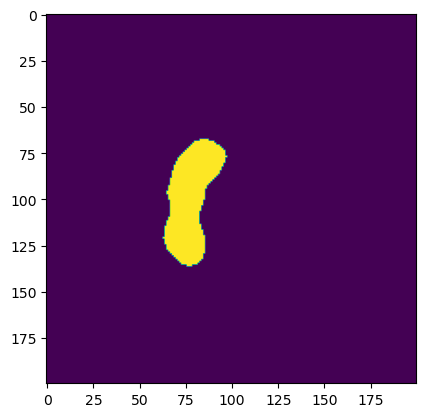

In [4]:
file_name = file_list[0]
key = int(file_name.split("_")[-1][:-4])
image = imread(file_name)
plt.imshow(image[-1,-2] == key)
g = load_from_pkl(file_name[:-4]+".network")
cells = create_cells_from_image(image[:,-1], g)
key = int(file_name.split("_")[-1][:-4])
key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
print(key)

In [5]:
c_mating = Mating(image=image, cells=cells, center=key, g=g)
data = c_mating.center_cells_potential_pairs()
data['image'] = os.path.basename(file_name)

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/threadpoolctl.py:762: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


(7, 26)


In [11]:
data = c_mating.center_cells_potential_pairs(47)
data['image'] = os.path.basename(file_name)

(7, 26)


In [12]:
data.iloc[0]

p                                                                 57
p_type                                                             1
p_start                                                         -101
p_area                                                         532.0
p_axis                                                     29.348681
p_eccentricity                                              0.612864
p_neighbor_same                                                    4
p_neighbor_diff                                                    1
m                                                                 59
m_type                                                             2
m_start                                                         -100
m_area                                                         416.0
m_axis                                                     27.345978
m_eccentricity                                              0.700251
m_neighbor_same                   

## 1. number of neighbor

In [98]:
data = c_mating.center_cells_potential_pairs(47)

In [109]:
c_mating.p

57

[0, 1, 2, 3, 4, 5, 6, 7]

In [49]:
c_mating.cells[57].feature(frame=17)

array([[1057, 3.0791569707733224, 27.99433451198143, 23.194243680228436,
        506.0, 0.5599395106139218, array([[ 96.5       ,  75.        ],
                                          [ 96.5       ,  76.45698204],
                                          [ 97.14627021,  77.64627021],
                                          [ 97.5       ,  78.95673257],
                                          [ 97.79254041,  80.29254041],
                                          [ 98.8227823 ,  81.3227823 ],
                                          [ 99.85302418,  82.35302418],
                                          [100.88326607,  83.38326607],
                                          [102.20640118,  83.70640118],
                                          [103.23664306,  84.73664306],
                                          [104.37743231,  85.5       ],
                                          [105.83441436,  85.5       ],
                                          [106.91315515,  86.41

In [120]:
c_mating.cells[57].feature(frame=17)

array([[1057, 3.0791569707733224, 27.99433451198143, 23.194243680228436,
        506.0, 0.5599395106139218, array([[ 96.5       ,  75.        ],
                                          [ 96.5       ,  76.45698204],
                                          [ 97.14627021,  77.64627021],
                                          [ 97.5       ,  78.95673257],
                                          [ 97.79254041,  80.29254041],
                                          [ 98.8227823 ,  81.3227823 ],
                                          [ 99.85302418,  82.35302418],
                                          [100.88326607,  83.38326607],
                                          [102.20640118,  83.70640118],
                                          [103.23664306,  84.73664306],
                                          [104.37743231,  85.5       ],
                                          [105.83441436,  85.5       ],
                                          [106.91315515,  86.41

In [102]:
data.columns

Index(['p', 'm', 'p_type', 'm_type', 'p_start', 'p_area', 'p_axis',
       'p_eccentricity', 'm_start', 'm_area', 'm_axis', 'm_eccentricity',
       'neighbor_m', 'neighbor_p', 'p_angle', 'm_angle', 'p_angle_index',
       'm_angle_index', 'center_dist', 'nearest_dist', 'flag', 'time_measure',
       'time_0', 'ref'],
      dtype='object')

In [103]:
data.neighbor_m

0    2
1    3
2    4
3    2
4    1
5    2
6    1
Name: neighbor_m, dtype: int64

In [104]:
data.neighbor_p

0    6
1    3
2    3
3    7
4    7
5    1
6    4
Name: neighbor_p, dtype: int64

In [50]:
c_mating.neighbor_number(c_mating.p, frame=17)

[6, 1]

In [53]:
c_mating.neighbor(center=c_mating.p, ctype=True, frame=17)

array([17, 23, 51, 52, 56, 58])

In [54]:
c_mating.neighbor(center=c_mating.p, ctype=False, frame=17)

array([22])

In [55]:
c_mating.neighbor(center=c_mating.p, ctype=True, frame=22)

array([23, 51, 52, 58])

In [56]:
c_mating.neighbor(center=c_mating.p, ctype=False, frame=22)

array([59])

In [55]:
c_mating.neighbor(center=c_mating.p, ctype=True, frame=19)

array([23, 51, 52, 56, 58])

In [60]:
c_mating.neighbor(center=c_mating.p, ctype=False, frame=19)

array([], dtype=int64)

In [59]:
c_mating.neighbor(center=c_mating.p, ctype=False, frame=22)

array([59])

In [26]:
data = pd.DataFrame()
for id in nei_list:
    frames = c_mating.cells[id].frames
    data.loc[id, frames] = 1

In [28]:
data.loc[:, 17]

1     1.0
2     1.0
3     1.0
4     1.0
9     1.0
11    1.0
12    1.0
15    1.0
16    1.0
17    1.0
18    1.0
20    1.0
21    1.0
23    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
35    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
43    1.0
44    1.0
46    1.0
48    1.0
49    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
58    1.0
61    NaN
62    NaN
63    NaN
Name: 17, dtype: float64

#### 3. batch process

In [3]:
root = "/media/wd/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")

In [4]:
all_time = {}
for i in trange(0, len(file_list)):
    file_name = file_list[i]
    try:
        image = imread(file_name)
        g = load_from_pkl(file_name[:-4]+".network")
        cells = create_cells_from_image(image[:,-1], g)
        key = int(file_name.split("_")[-1][:-4])
        key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
        c_mating = Mating(image=image, cells=cells, center=key, g=g)
        start_time = min(cells[c_mating.p].start, cells[c_mating.m].start)
        end_time = cells[c_mating.p].end
        for flag, time in enumerate(range(end_time, start_time, -10)):
            data = c_mating.center_cells_potential_pairs(time)
            if data is not None:
                data['image'] = os.path.basename(file_name)
                if '-'+str(flag) not in all_time.keys():
                    all_time['-'+str(flag)] = None
                all_time['-'+str(flag)] = pd.concat([all_time['-'+str(flag)], data])

        data = c_mating.center_cells_potential_pairs(cells[c_mating.p].start)
        if data is not None:
            data['image'] = os.path.basename(file_name)
            if 'start_p' not in all_time.keys():
                all_time['start_p'] = None
            all_time["start_p"] = pd.concat([all_time["start_p"], data])
        
        data = c_mating.center_cells_potential_pairs(cells[c_mating.m].start)
        if data is not None:
            data['image'] = os.path.basename(file_name)
            if 'start_m' not in all_time.keys():
                all_time['start_m'] = None
            all_time["start_m"] = pd.concat([all_time["start_m"], data])
        # if c_mating.cells[c_mating.p].end-20 > 0:
        #     data = c_mating.center_cells_potential_pairs(time=c_mating.cells[c_mating.p].end-20)
        #     if data is not None:
        #         data['image'] = os.path.basename(file_name)
        #         all_time_end_20 = pd.concat([all_time_end_20, data])
        # if c_mating.cells[c_mating.p].end-30 > 0:
        #     data = c_mating.center_cells_potential_pairs(time=c_mating.cells[c_mating.p].end-30)
        #     if data is not None:
        #         data['image'] = os.path.basename(file_name)
        #         all_time_end_30 = pd.concat([all_time_end_30, data])
    except Exception as error:
    # handle the exception
        print(file_name," : ", error)

  0%|                                                   | 0/195 [00:00<?, ?it/s]/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/threadpoolctl.py:762: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
100%|███████████████████████████████████████| 195/195 [1:03:11<00:00, 19.44s/it]


In [6]:
dump_to_pkl(all_time, "./all_time_new22.obj")
# data = load_from_pkl("./all_time_new22.obj")

#### 4. get all mated cell's trend of ecc (ecc value from start time point to fusion time point of p and m cell)

In [25]:
root = "/media/wd/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")

In [26]:
## plot figures
for i in trange(0, len(file_list)):
    file_name = file_list[i]
    image = imread(file_name)
    g = load_from_pkl(file_name[:-4]+".network")
    cells = create_cells_from_image(image[:,-1], g)
    key = int(file_name.split("_")[-1][:-4])
    key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
    c_mating = Mating(image=image, cells=cells, center=key, g=g)
    dump_to_pkl(c_mating,file_name[:-4]+'.mt')
    p_y = c_mating.cells[c_mating.p].eccentricity_
    p_x = c_mating.cells[c_mating.p].frames
    m_y = c_mating.cells[c_mating.m].eccentricity_
    m_x = c_mating.cells[c_mating.m].frames
    fig, axs = plt.subplots()
    plt.plot(p_x, p_y,c='g')
    plt.plot(m_x, m_y,c='r')
    plt.title(f"p_ecc vs m_ecc\n{file_name}")
    plt.savefig(f"p_ecc vs m_ecc\n{os.path.basename(file_name)}.png")

  0%|                                                   | 0/195 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [26]:
data_p = pd.DataFrame()# pd.DataFrame(columns=['timepoint','value'])
data_m = pd.DataFrame()# pd.DataFrame(columns=['timepoint','value'])
for i in trange(0, len(file_list)):
    file_name = file_list[i]
    c_mating = load_from_pkl(file_name[:-4]+'.mt')
    p_y = c_mating.cells[c_mating.p].eccentricity_
    p_x = c_mating.cells[c_mating.p].frames
    m_y = c_mating.cells[c_mating.m].eccentricity_
    m_x = c_mating.cells[c_mating.m].frames
    t_fusion = max(max(p_x), max(m_x))
    data_p.loc[i, np.array(p_x) - t_fusion] = p_y
    data_m.loc[i, np.array(m_x) - t_fusion] = m_y

100%|█████████████████████████████████████████| 195/195 [00:40<00:00,  4.81it/s]


In [27]:
data_p = data_p.reindex(sorted(data_p.columns), axis=1)
data_m = data_m.reindex(sorted(data_m.columns), axis=1)
# data_p.to_csv("./csv/fusioncell_p_ecc_trend1.csv")
# data_m.to_csv("./csv/fusioncell_m_ecc_trend1.csv")

In [28]:
data_timepoint = pd.DataFrame(columns=['timepoint','values','t'])
for i in range(0, data_p.shape[0]):
    tmp = data_p.iloc[i].dropna()
    # tmp = tmp - tmp[0]
    data = pd.DataFrame(np.array([tmp.index, tmp.values]).T, columns=['timepoint','values'])
    data['t'] = 'p'
    data_timepoint = pd.concat([data_timepoint,data])

for i in range(0, data_m.shape[0]):
    tmp = data_m.iloc[i].dropna()
    # tmp = tmp - tmp[0]
    data = pd.DataFrame(np.array([tmp.index, tmp.values]).T, columns=['timepoint','values'])
    data['t'] = 'm'
    data_timepoint = pd.concat([data_timepoint,data])
data_timepoint.to_csv("./csv/ecc_trend_1_table.csv")

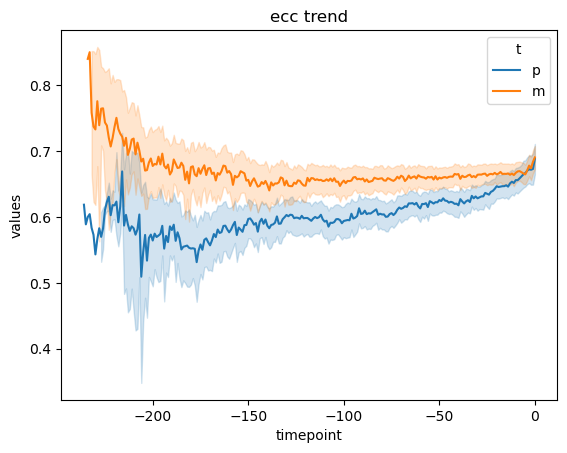

In [29]:
sns.lineplot(data_timepoint, x="timepoint", y="values", hue="t", estimator='mean', errorbar=('ci', 95))
             # hue="region", style="event",
             # data=fmri)
plt.title("ecc trend")
plt.savefig("ecc_trend_1.png")

#### get area trajctor

In [27]:
from cellmating.resolution import find_key

In [28]:
data_p_area = pd.DataFrame()# pd.DataFrame(columns=['timepoint','value'])
data_m_area = pd.DataFrame()# pd.DataFrame(columns=['timepoint','value'])
# data_timepoint_area = pd.DataFrame(columns=['timepoint','area', 't', 'reso', 'bins','ord'])
for i in trange(0, len(file_list)):
    file_name = file_list[i]
    c_mating = load_from_pkl(file_name[:-4]+'.mt')
    p_y = c_mating.cells[c_mating.p].area_
    p_x = c_mating.cells[c_mating.p].frames
    m_y = c_mating.cells[c_mating.m].area_
    m_x = c_mating.cells[c_mating.m].frames
    t_fusion = max(max(p_x), max(m_x))
    k,v = find_key(file_name)
    data_p_area.loc[i, np.array(p_x) - t_fusion] = p_y*(v['reso']**2)*(v['bin']**2)
    data_m_area.loc[i, np.array(m_x) - t_fusion] = m_y*(v['reso']**2)*(v['bin']**2)

 39%|████████████████▌                         | 77/195 [00:10<00:16,  7.05it/s]


KeyboardInterrupt: 

In [126]:
data_timepoint_area = pd.DataFrame(columns=['timepoint','values','t'])
for i in range(0, data_p_area.shape[0]):
    tmp = data_p_area.iloc[i].dropna()
    # tmp = tmp - tmp[0]
    data = pd.DataFrame(np.array([tmp.index, tmp.values]).T, columns=['timepoint','values'])
    data['t'] = 'p'
    data_timepoint_area = pd.concat([data_timepoint_area,data])

for i in range(0, data_m_area.shape[0]):
    tmp = data_m_area.iloc[i].dropna()
    # tmp = tmp - tmp[0]
    data = pd.DataFrame(np.array([tmp.index, tmp.values]).T, columns=['timepoint','values'])
    data['t'] = 'm'
    data_timepoint_area = pd.concat([data_timepoint_area, data])
data_timepoint_area.to_csv("./csv/area_trend_table.csv")

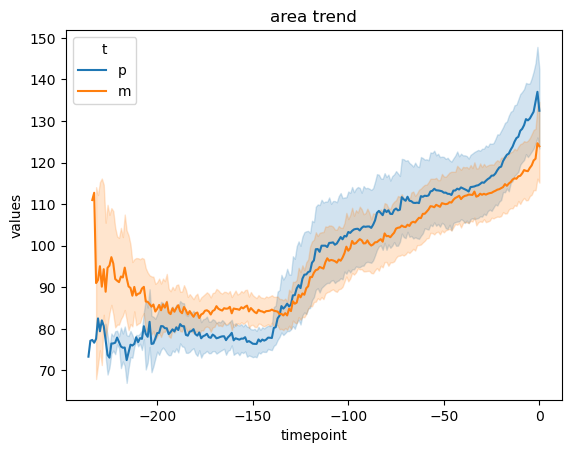

In [128]:
sns.lineplot(data_timepoint_area, x="timepoint", y="values", hue="t", estimator='mean', errorbar=('ci', 95))
             # hue="region", style="event",
             # data=fmri)
plt.title("area trend")
plt.savefig("area.png")

#### 6.get angle trajctor

In [6]:
keys = ['eccentricity', 'area', 'angle']
data_table = {}
for k in keys:
    data_table[k] = pd.DataFrame()

In [7]:
for i in trange(0, len(file_list)):
    file_name = file_list[i]
    c_mating = load_from_pkl(file_name[:-4]+'.mt')
    c_mating.measure = c_mating.init_measure()
    p_x = c_mating.cells[c_mating.p].frames
    m_x = c_mating.cells[c_mating.m].frames
    t_fusion = max(max(p_x), max(m_x))
    
    for k in keys:
        if k == 'angle':
            inter_frame = np.array(list(set(m_x).intersection(set(p_x))))
            ang = []
            ang_index = []
            for t in inter_frame:
                ang.append(c_mating.angles(c_mating.p, [c_mating.m], frame=t)[0])
                ang_index.append(c_mating.angles_index(c_mating.p, [c_mating.m], frame=t)[0])
            ang = np.array(ang)
            ang_index = np.array(ang_index)
            if len(ang) > 0:
                data = pd.DataFrame(np.array([inter_frame-t_fusion, ang[:,0],ang[:,1],
                                              ang_index[:,0], ang_index[:,1]]).T,
                                    columns=['timepoint','angle_p','angle_m','angle_index_p','angle_index_m'])
                data['idx'] = i
                data_table[k] = pd.concat([data_table[k], data])
        elif k == 'eccentricity':
            p_y = c_mating.cells[c_mating.p].eccentricity_
            m_y = c_mating.cells[c_mating.m].eccentricity_
            t_fusion = max(max(p_x), max(m_x))
            data = pd.DataFrame(np.array([np.array(p_x)-t_fusion, p_y]).T, columns=['timepoint','value'])
            data['t']='p'
            data['idx'] = i
            data_table[k] = pd.concat([data_table[k], data])

            data = pd.DataFrame(np.array([np.array(m_x)-t_fusion, m_y]).T, columns=['timepoint','value'])
            data['t']='m'
            data['idx'] = i
            data_table[k] = pd.concat([data_table[k], data])
        elif k == 'area':
            p_y = c_mating.cells[c_mating.p].area_
            m_y = c_mating.cells[c_mating.m].area_
            t_fusion = max(max(p_x), max(m_x))
            data = pd.DataFrame(np.array([np.array(p_x)-t_fusion, p_y]).T, columns=['timepoint','value'])
            data['t']='p'
            data['idx'] = i
            data_table[k] = pd.concat([data_table[k], data])

            data = pd.DataFrame(np.array([np.array(m_x)-t_fusion, m_y]).T, columns=['timepoint','value'])
            data['t']='m'
            data['idx'] = i
            data_table[k] = pd.concat([data_table[k], data])

100%|█████████████████████████████████████████| 195/195 [27:45<00:00,  8.54s/it]


In [12]:
dump_to_pkl(data_table, "mated_cell_feature_time_trend.obj")

<Axes: xlabel='timepoint', ylabel='angle_p'>

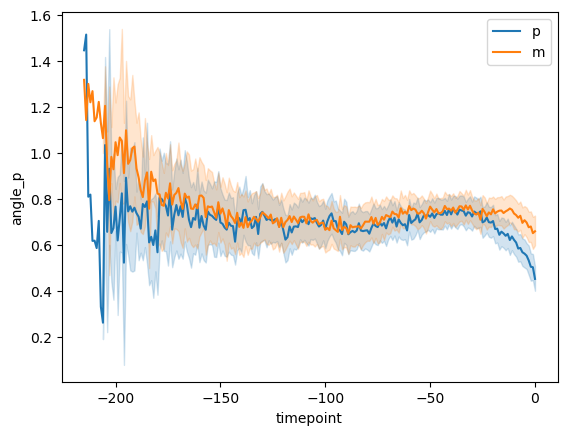

In [8]:
sns.lineplot(data_table['angle'], x="timepoint", y="angle_p", estimator='mean', errorbar=('ci', 95),label='p')
             # hue="region", style="event",
             # data=fmri)
sns.lineplot(data_table['angle'], x="timepoint", y="angle_m", estimator='mean', errorbar=('ci', 95),label='m')
             # hue="region", style="event",
             # data=fmri)

In [23]:
def norm_angle_index(data):
    data = data%30
    data[data>15] = 30-data[data>15]
    return data

data = data_table['angle']
data['angle_index_p'] = norm_angle_index(data['angle_index_p'])
data['angle_index_m'] = norm_angle_index(data['angle_index_m'])

In [30]:
data.to_csv("./csv/angle_trend_table.csv")

<Axes: xlabel='timepoint', ylabel='angle_index_p'>

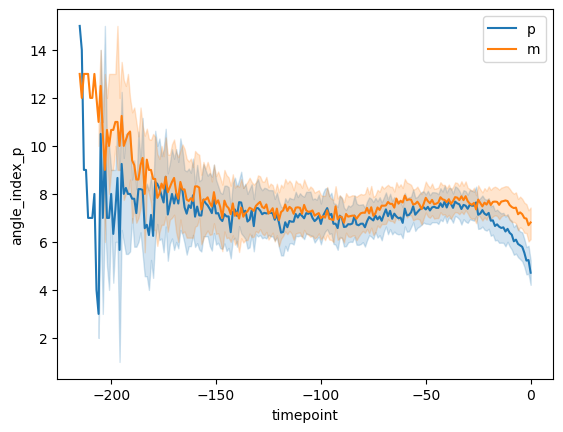

In [22]:
sns.lineplot(data, x="timepoint", y="angle_index_p", estimator='mean', errorbar=('ci', 95),label='p')
             # hue="region", style="event",
             # data=fmri)
sns.lineplot(data, x="timepoint", y="angle_index_m", estimator='mean', errorbar=('ci', 95),label='m')
             # hue="region", style="event",
             # data=fmri)

In [211]:
file_name = file_list[0]
c_mating = load_from_pkl(file_name[:-4]+'.mt')
c_mating.measure = c_mating.init_measure()

In [215]:
p_x = c_mating.cells[c_mating.p].frames
m_x = c_mating.cells[c_mating.m].frames
t_fusion = max(max(p_x), max(m_x))

In [216]:
inter_frame = np.array(list(set(m_x).intersection(set(p_x))))

In [220]:
inter_frame = np.array(list(set(m_x).intersection(set(p_x))))
ang = []
ang_index = []
for t in inter_frame:
    ang.append(c_mating.angles(c_mating.m, [c_mating.p], frame=t)[0])
    ang_index.append(c_mating.angles_index(c_mating.m, [c_mating.p], frame=t)[0])
ang = np.array(ang)
ang_index = np.array(ang_index)

In [218]:
c_mating.angles(c_mating.m, [c_mating.p], frame=18)[0]

[0.7450288931957036, 0.48803171125502165]

In [219]:
c_mating.angles_index(c_mating.m, [c_mating.p], frame=18)[0]

[52, 5]

In [214]:
ang = []
ang_index = []
for t in inter_frame:
    ang.append(c_mating.angles(c_mating.m, [c_mating.p], frame=t)[0])
    ang_index.append(c_mating.angles_index(c_mating.m, [c_mating.p], frame=t)[0])

<bound method Cells.angles of <cellmating.mating._mating_movie.Mating object at 0x7f5e43b20d30>>

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

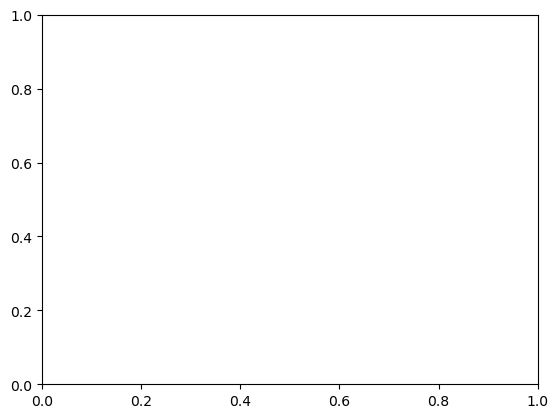

In [209]:
sns.lineplot(data_table['angle'], x="timepoint", y="angle_index_p", estimator='mean', errorbar=('ci', 95),label='p')
             # hue="region", style="event",
             # data=fmri)
sns.lineplot(data_table['angle'], x="timepoint", y="angle_index_m", estimator='mean', errorbar=('ci', 95),label='m')
             # hue="region", style="event",
             # data=fmri)

In [202]:
data_table['angle']%%latex

,timepoint,angle_p,angle_m,idx
0,-99.0,0.745029,0.488032,0
1,-98.0,0.163549,0.398629,0
2,-97.0,0.537812,0.307760,0
3,-96.0,0.630557,0.398362,0
4,-95.0,0.530023,0.380317,0
...,...,...,...,...
113,-4.0,1.530469,0.546708,194
114,-3.0,1.233605,0.400066,194
115,-2.0,1.252450,0.318199,194
116,-1.0,1.284698,0.329382,194


In [186]:
data = pd.DataFrame(np.array([inter_frame, ang1[:,0],ang1[:,1],]).T, columns=['timepoint','angle_p','angle_m'])

In [177]:
ang1 = []
for t in inter_frame:
    ang1.append(c_mating.angles(c_mating.p, [c_mating.m], frame=t)[0])
ang1 = np.array(ang1)
ang2 = []
for t in inter_frame:
    ang2.append(c_mating.angles(c_mating.m, [c_mating.p], frame=t)[0])
ang2 = np.array(ang2)

In [213]:
data_timepoint_center = pd.DataFrame(columns=['timepoint','x','y','t','ord'])
for i in trange(0, len(file_list)):
    file_name = file_list[i]
    c_mating = load_from_pkl(file_name[:-4]+'.mt')
    p_y = c_mating.cells[c_mating.p].center_
    p_x = c_mating.cells[c_mating.p].frames
    m_y = c_mating.cells[c_mating.m].center_
    m_x = c_mating.cells[c_mating.m].frames
    t_fusion = max(max(p_x), max(m_x))
    k,v = 
    p_y = p_y-p_y[0]
    data = pd.DataFrame(np.array([np.array(p_x) - t_fusion, p_y[:,0],p_y[:,1]]).T, columns=['timepoint','x','y'])
    data['t'] = 'p'
    data['ord'] = i
    data_timepoint_center = pd.concat([data_timepoint_center, data])
    
    m_y = m_y-m_y[0]
    data = pd.DataFrame(np.array([np.array(m_x) - t_fusion, m_y[:,0],m_y[:,1]]).T, columns=['timepoint','x','y'])
    data['t'] = 'm'
    data['ord'] = i
    data_timepoint_center = pd.concat([data_timepoint_center, data])

100%|█████████████████████████████████████████| 195/195 [00:37<00:00,  5.14it/s]


In [214]:
data_timepoint_center.to_csv("data_timepoint_center.csv")

In [224]:
data

,timepoint,x,y,t,ord
0,-96,0.0,0.0,p,1
1,-95,0.632031,-0.757597,p,1
2,-94,0.507365,-0.656989,p,1
3,-93,0.046561,-0.790092,p,1
4,-92,0.36472,-0.764146,p,1
...,...,...,...,...,...
81,-5,-2.976581,-5.54819,m,1
82,-4,-3.25993,-5.861887,m,1
83,-3,-3.565934,-6.342125,m,1
84,-2,-4.021805,-6.818305,m,1


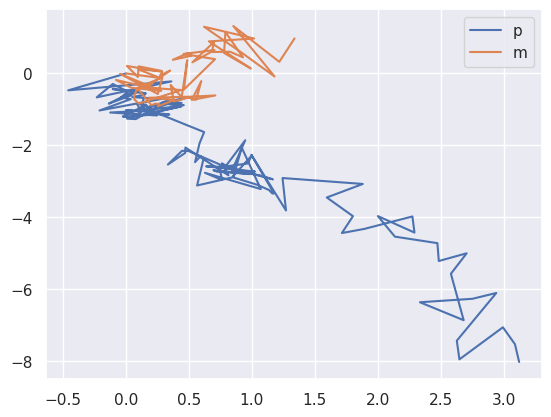

In [244]:
data = data_timepoint_center[data_timepoint_center.ord==16]
plt.plot(data[data.t=='p'].x, data[data.t=='p'].y, label='p')
plt.plot(data[data.t=='m'].x, data[data.t=='m'].y, label='m')
plt.legend()

Text(0.5, 1.0, 'center')

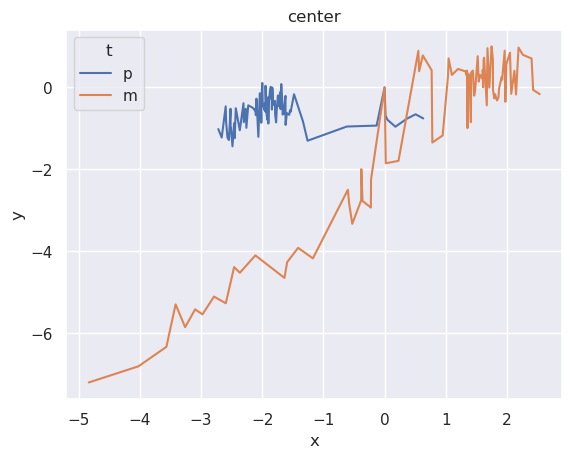

In [222]:
sns.lineplot(data_timepoint_center[data_timepoint_center.ord==1], x="x", y="y", hue="t", estimator='mean', errorbar=('ci', 95))
             # hue="region", style="event",
             # data=fmri)
plt.title("center")

In [156]:
data_p = data_p.reindex(sorted(data_p.columns), axis=1)
data_m = data_m.reindex(sorted(data_m.columns), axis=1)
data_p.to_csv("./csv/fusioncell_p_ecc_trend.csv")

In [184]:
data_timepoint = pd.DataFrame(columns=['timepoint','values','t'])
for i in range(0, data_p.shape[0]):
    tmp = data_p.iloc[i].dropna()
    # tmp = tmp - tmp[0]
    data = pd.DataFrame(np.array([tmp.index, tmp.values]).T, columns=['timepoint','values'])
    data['t'] = 'p'
    data_timepoint = pd.concat([data_timepoint,data])

for i in range(0, data_m.shape[0]):
    tmp = data_m.iloc[i].dropna()
    # tmp = tmp - tmp[0]
    data = pd.DataFrame(np.array([tmp.index, tmp.values]).T, columns=['timepoint','values'])
    data['t'] = 'm'
    data_timepoint = pd.concat([data_timepoint,data])

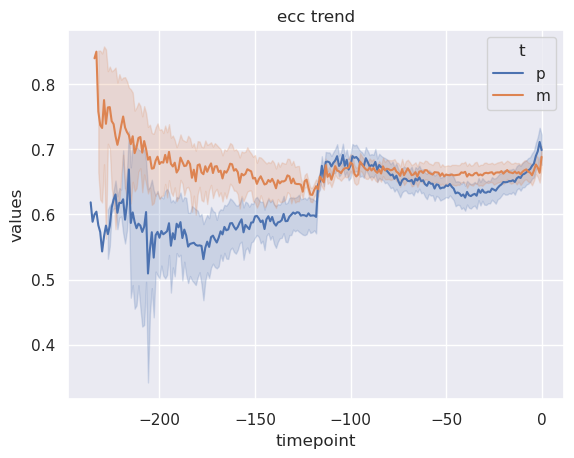

In [185]:
sns.lineplot(data_timepoint, x="timepoint", y="values", hue="t", estimator='mean', errorbar=('ci', 95))
             # hue="region", style="event",
             # data=fmri)
plt.title("ecc trend")
plt.savefig("ecc_trend.png")

In [95]:
data_m

,-234,-233,-232,-231,-230,-229,-228,-227,-226,-225,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.472523,0.528698,0.480209,0.588372,0.531420,0.587959,0.564829,0.582383,0.560943,0.569395
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.621868,0.580729,0.630117,0.579338,0.604687,0.538780,0.525168,0.536611,0.579939,0.514353
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.730495,0.695203,0.703893,0.710579,0.683793,0.714444,0.729085,0.701339,0.717491,0.711625
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.676776,0.693354,0.655215,0.649226,0.588223,0.603533,0.617700,0.661241,0.630244,0.656351
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.649548,0.647898,0.650248,0.649370,0.639922,0.671547,0.660330,0.685103,0.676728,0.697685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500076,0.501626,0.479915,0.468918,0.490791,0.486605,0.536138,0.562724,0.598277,0.539631
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.818953,0.818016,0.805689,0.789632,0.789229,0.784145,0.772399,0.773739,0.778362,0.769370
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.774446,0.777260,0.787504,0.782455,0.782824,0.768582,0.762756,0.758584,0.762910,0.915234
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.811014,0.804591,0.806763,0.827228,0.823244,0.823750,0.829029,0.823893,0.835388,0.823861


In [197]:
c_mating.cells[c_mating.p].eccentricities(frame=110)

array([0.6681754621977615], dtype=object)

In [200]:
c_mating.cells[c_mating.p].eccentricities(frame=np.arange(30,40))

array([0.48646211055657795, 0.34331260467032204, 0.37455697642027014,
       0.3585898329439665, 0.5266583727202944, 0.5721935830506694,
       0.6338452155009042, 0.6459255318294267, 0.6698055960218693,
       0.6737441362378158], dtype=object)

In [198]:
c_mating = load_from_pkl("/media/wd/T7/data/mating_all/20220903_YAV2104xYAV2105_003/selected/YAV2104xYAV2105_005_06_rigid_004003.mt")

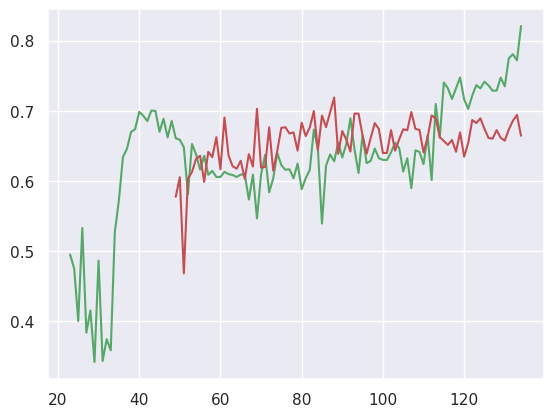

In [199]:
p_y = c_mating.cells[c_mating.p].eccentricity_
p_x = c_mating.cells[c_mating.p].frames
m_y = c_mating.cells[c_mating.m].eccentricity_
m_x = c_mating.cells[c_mating.m].frames
fig, axs = plt.subplots()
plt.plot(p_x, p_y,c='g')
plt.plot(m_x, m_y,c='r')
# plt.title(f"p_ecc vs m_ecc\n{file_name}")

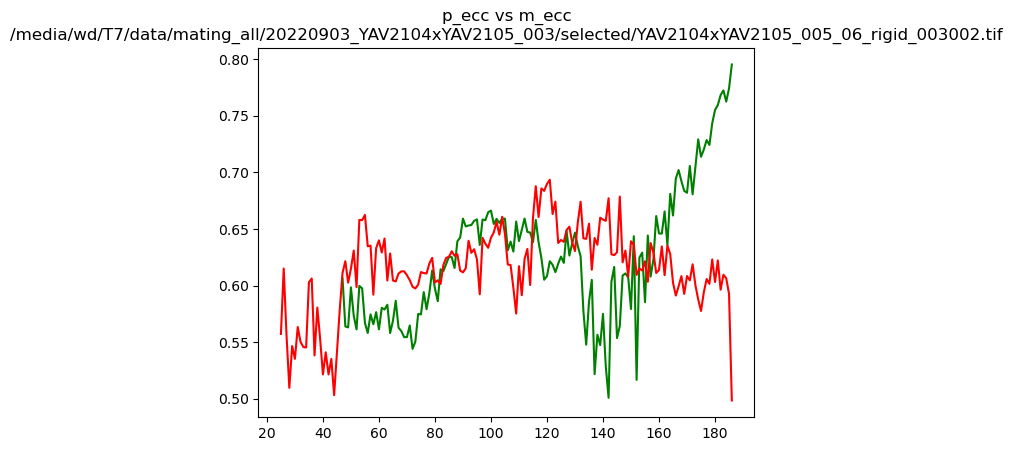